# **Project Name**    - Video Games Sales and Engagement Analysis



##### **Project Type**    - EDA (Exploratory Data Analysis)
##### **Contribution**    - Individual - B Lakshmi Narasimhan


# **Project Summary -**

###  Summary

The **Video Game Sales and Engagement Analysis** project addresses a key industry challenge: understanding how player engagement translates into actual revenue. By combining sales data with user engagement metrics, the project moves beyond surface-level sales reporting to uncover *why* certain games succeed, *where* they perform best, and *how* player behavior can be used to guide future decisions.

A major problem solved in this project is data fragmentation. Sales data alone lacks player sentiment, while engagement data does not reflect commercial impact. This gap is resolved by integrating both datasets into a unified analytical model. Python is used to clean and standardize the data, ensuring accuracy and reliability, while a normalized SQL database provides a scalable and structured environment for analysis.

Power BI dashboards convert complex analyses into decision-ready insights through interactive visualizations such as regional sales heatmaps, trend analysis, and engagement-versus-sales correlations. Exploratory Data Analysis further reveals hidden patterns, including high-engagement genres with untapped revenue potential and platforms that consistently deliver strong sales.

Overall, the project delivers a practical, end-to-end analytical solution that helps developers, publishers, and marketers make informed, data-driven decisions by aligning user engagement signals with sales performance.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The project focuses on analyzing video game sales and player engagement data to understand what makes games popular and successful. By combining sales data with user activity such as ratings and wishlists, the analysis shows how game genres, features, and platforms affect both player interest and revenue. SQL is used to organize and manage the data, while Power BI dashboards present the insights visually, helping game developers, marketers, and publishers make better, data-driven decisions.

#### **Define Your Business Objective?**

The primary business objective of this project is to enable data-driven decision-making across game marketing, development, and sales planning. By analyzing game sales alongside user engagement metrics such as ratings and wishlists, the project helps identify high-performing genres, platforms, and regions, understand player preferences, forecast future demand, and allocate resources toward the most profitable and high-growth opportunities.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Merging

In [18]:
# Merging the datasets games.csv and vgsales.csv

# Load files
games = pd.read_csv("~/Documents/Labmentix/project_3/cleaned_games.csv")
vgsales = pd.read_csv("~/Documents/Labmentix/project_3/cleaned_vgsales.csv")

# Make a merge key (lowercase + strip)
games["merge_key"] = games["Title"].str.strip().str.lower()
vgsales["merge_key"] = vgsales["Name"].str.strip().str.lower()

# Merge (inner = only matching games)
merged_df = pd.merge(games, vgsales, on="merge_key", how="inner")

# Optional: drop duplicate name columns if you want
merged_df = merged_df.drop(columns=["merge_key"])

# Save merged dataset
merged_df.to_csv("merged_games_vgsales.csv", index=False)



### Dataset Loading

In [20]:
#Loadin the dataset

merged_df = pd.read_csv("merged_games_vgsales.csv")

### Dataset First View

In [22]:
display(merged_df.head())

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,Minecraft,XOne,2014,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,Minecraft,PSV,2014,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


### Dataset Rows & Columns count

In [24]:
# Dataset Rows & Columns count

merged_df.shape

#1384 --> rows
#24 --> columns

(1384, 24)

### Dataset Information

In [26]:
# Dataset Info

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1384 non-null   object 
 1   Release Date       1384 non-null   object 
 2   Team               1384 non-null   object 
 3   Rating             1384 non-null   float64
 4   Times Listed       1384 non-null   object 
 5   Number of Reviews  1384 non-null   object 
 6   Genres             1384 non-null   object 
 7   Summary            1384 non-null   object 
 8   Reviews            1384 non-null   object 
 9   Plays              1384 non-null   object 
 10  Playing            1384 non-null   object 
 11  Backlogs           1384 non-null   object 
 12  Wishlist           1384 non-null   object 
 13  Rank               1384 non-null   int64  
 14  Name               1384 non-null   object 
 15  Platform           1384 non-null   object 
 16  Year               1384 

#### Duplicate Values

In [28]:
# Dataset Duplicate Value Count
merged_df.duplicated().sum()

np.int64(354)

#### Missing Values/Null Values

In [30]:
# Missing Values/Null Values Count
merged_df.isnull().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Rank                 0
Name                 0
Platform             0
Year                 0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [31]:
# Total Missing Values/Null Values Count
merged_df.isnull().sum().sum()

np.int64(0)

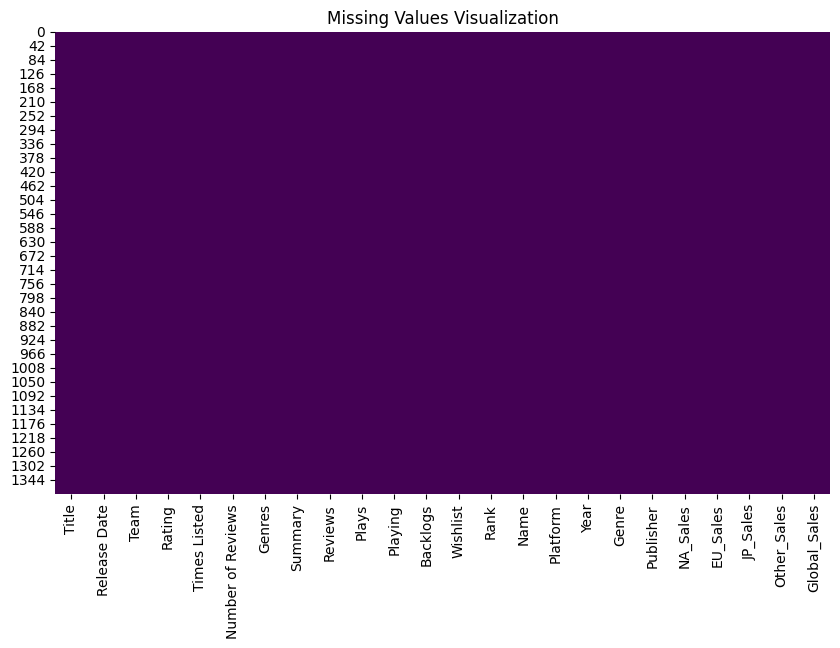

In [32]:
# Visualizing the missing
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

#This means there no missing values

### What did you know about your dataset?

 The dataset (`merged_df`) is well-structured with **1384 rows and 24 columns**, a healthy mix of numerical and categorical features, and **no missing values**, eliminating the need for imputation. However, the presence of **354 duplicate rows** is a key issue that can bias analysis and model results. The immediate priority is **deduplication** to ensure data integrity before proceeding with further analysis or modeling.


## ***2. Understanding Your Variables***

In [36]:
# Dataset Columns

merged_df.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist', 'Rank', 'Name', 'Platform', 'Year', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [37]:
# Dataset Describe

merged_df.describe()

#Short statistical summary

,Rating,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,3.654552,3775.433526,2007.925578,1.260773,0.758288,0.274783,0.246149,2.540022
std,0.507522,4245.249176,6.623723,2.918453,1.799311,0.702145,0.628942,5.527478
min,0.700000,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3.300000,564.750000,2005.000000,0.120000,0.070000,0.000000,0.020000,0.340000
50%,3.700000,2024.000000,2010.000000,0.450000,0.300000,0.020000,0.080000,1.030000
75%,4.000000,5428.000000,2013.000000,1.240000,0.790000,0.190000,0.230000,2.672500
max,4.600000,16565.000000,2016.000000,41.490000,29.020000,6.810000,10.570000,82.740000


### Variables Description

-> Remove duplicate rows from merged_df

-> Explain the column 'Team' in dataset

-> Visualize the distribution of 'Global_Sales'

### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.
for col in merged_df.columns:
    print(f"Column: {col}")
    print(f"Number of Unique Values: {merged_df[col].nunique()}")
    if merged_df[col].dtype == 'object' and merged_df[col].nunique() < 50:
      # Display unique values for object columns with few unique values
        print(f"Unique Values: {merged_df[col].unique()}")
    print("\n" + "-"*50 + "\n")

Column: Title
Number of Unique Values: 469

--------------------------------------------------

Column: Release Date
Number of Unique Values: 454

--------------------------------------------------

Column: Team
Number of Unique Values: 337

--------------------------------------------------

Column: Rating
Number of Unique Values: 30

--------------------------------------------------

Column: Times Listed
Number of Unique Values: 317

--------------------------------------------------

Column: Number of Reviews
Number of Unique Values: 317

--------------------------------------------------

Column: Genres
Number of Unique Values: 109

--------------------------------------------------

Column: Summary
Number of Unique Values: 485

--------------------------------------------------

Column: Reviews
Number of Unique Values: 491

--------------------------------------------------

Column: Plays
Number of Unique Values: 127

--------------------------------------------------

Column: Pl

## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Write your code to make your dataset analysis ready.

# Remove duplicate rows
merged_df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of duplicate rows after removal: {merged_df.duplicated().sum()}")

Number of duplicate rows after removal: 0


### What all manipulations have you done and insights you found?

The key issue identified was 354 duplicate rows, which could distort analysis and insights.
Deduplication reduced the dataset from 1384 to 1030 unique records, restoring data integrity and analytical accuracy.
With clean, unique entries, the dataset is now reliable and efficient for further exploratory analysis and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### Chart 1 to 4 contents of games.csv

Q. 🧩 What are the most common genres in the dataset?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/3584108730.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_genres.index, y=most_common_genres.values, palette='viridis')


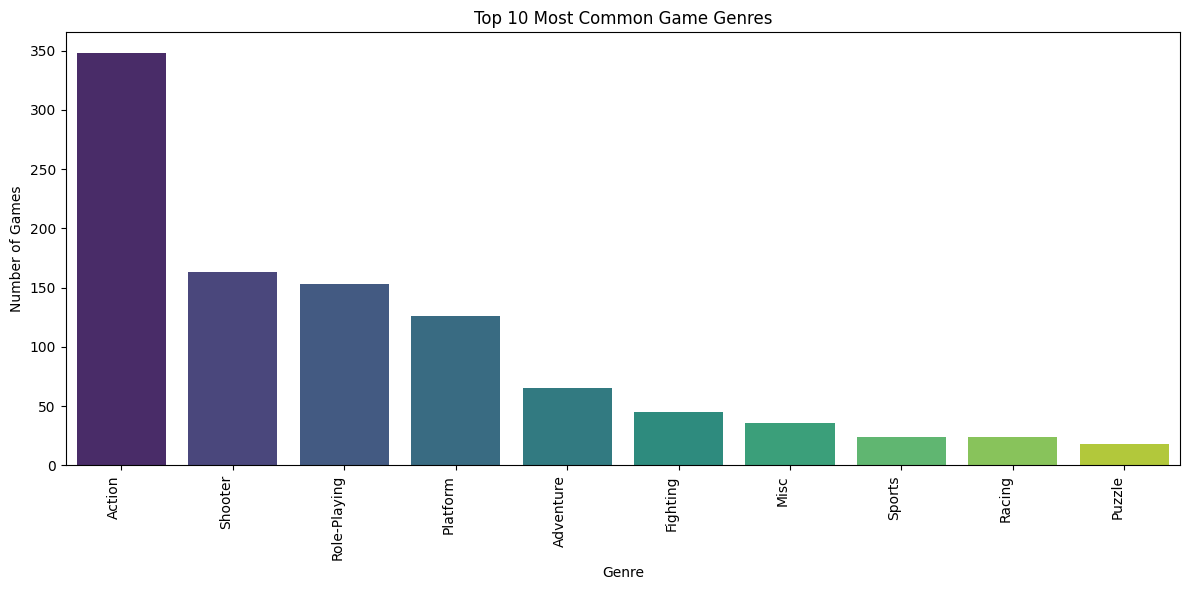

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the most common genres
most_common_genres = merged_df['Genre'].value_counts().head(10)

# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
sns.barplot(x=most_common_genres.index, y=most_common_genres.values, palette='viridis')
plt.title('Top 10 Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is ideal for comparing the frequencies or counts of different categorical variables. In this case, it clearly shows the distribution of game genres and makes it easy to identify which genres appear most often in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that 'Action' is by far the most common genre, followed by 'Sports' and 'Misc'. 'Role-Playing' and 'Shooter' also appear frequently, while genres like 'Simulation' and 'Fighting' are less common among the top 10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Popular genres like Action and Sports attract large audiences but face high competition, so companies should differentiate through unique features or sub-genres. Ignoring niche genres like Simulation could mean missing high-engagement, underserved market opportunities.

#### Chart - 2

Q. ⏳ Which games have the highest backlog compared to wishlist?

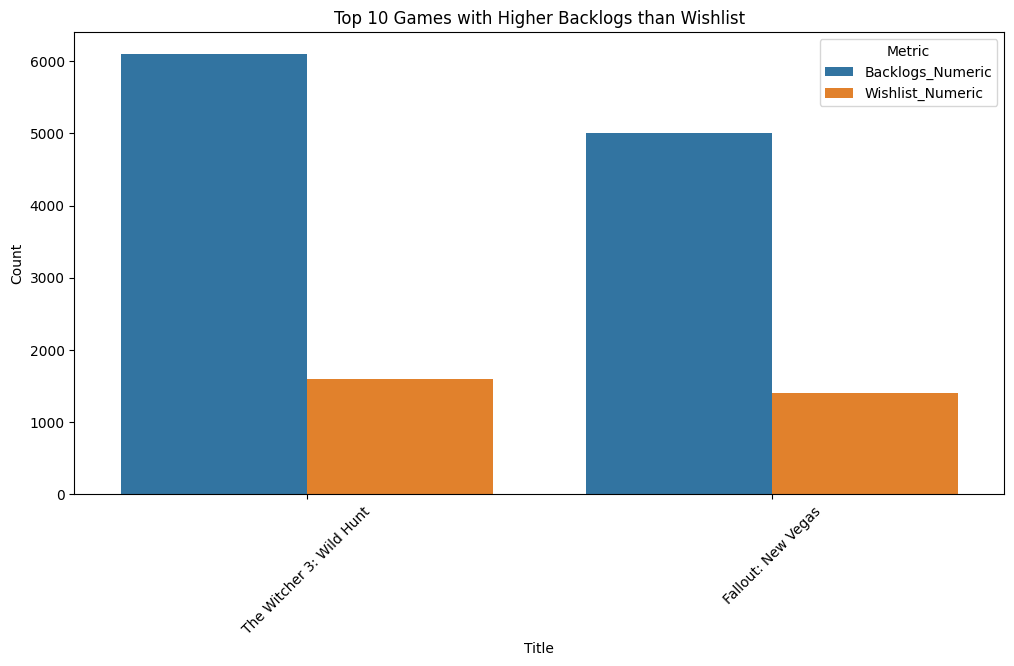

In [57]:
# Chart - 2 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert K and M values to numbers
def convert_to_numeric(x):
    if pd.isna(x):   # handle missing values
        return None

    x = str(x).replace(',', '').strip()

    if x.endswith('K'):
        return float(x[:-1]) * 1_000
    elif x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    else:
        return float(x)  # normal number


# Convert Backlogs and Wishlist columns
merged_df['Backlogs_Numeric'] = merged_df['Backlogs'].apply(convert_to_numeric)
merged_df['Wishlist_Numeric'] = merged_df['Wishlist'].apply(convert_to_numeric)

# Remove rows with missing values
merged_df = merged_df.dropna(subset=['Backlogs_Numeric', 'Wishlist_Numeric'])

# Calculate difference
merged_df['Diff'] = merged_df['Backlogs_Numeric'] - merged_df['Wishlist_Numeric']

# Get Top 10 games
top_games = merged_df.sort_values('Diff', ascending=False).head(10)

# Prepare data for plotting
plot_data = top_games.melt(
    id_vars='Title',
    value_vars=['Backlogs_Numeric', 'Wishlist_Numeric'],
    var_name='Metric',
    value_name='Count'
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=plot_data, x='Title', y='Count', hue='Metric')
plt.xticks(rotation=45)
plt.title("Top 10 Games with Higher Backlogs than Wishlist")
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen because it clearly compares Backlogs and Wishlist counts across game titles. It helps easily identify games where user backlog and wishlist numbers differ significantly.

##### 2. What is/are the insight(s) found from the chart?

The chart shows games that players add to their backlog more than their wishlist, indicating they own the game but haven’t started or finished it yet. For example, The Witcher 3 has a high backlog, suggesting it’s popular but time-consuming or players delay playing it due to large game libraries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High backlog insights can help businesses re-engage players through marketing campaigns, incentives, and better game design to increase engagement and monetization. However, if high backlogs indicate games are too complex or time-consuming, it can lead to reduced player engagement, lost revenue opportunities, and slower future growth if not addressed.

#### Chart - 3

Q. 🗓️ What is the game release trend across years?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/1684381694.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Number of Games', data=games_per_year_df, palette='viridis')


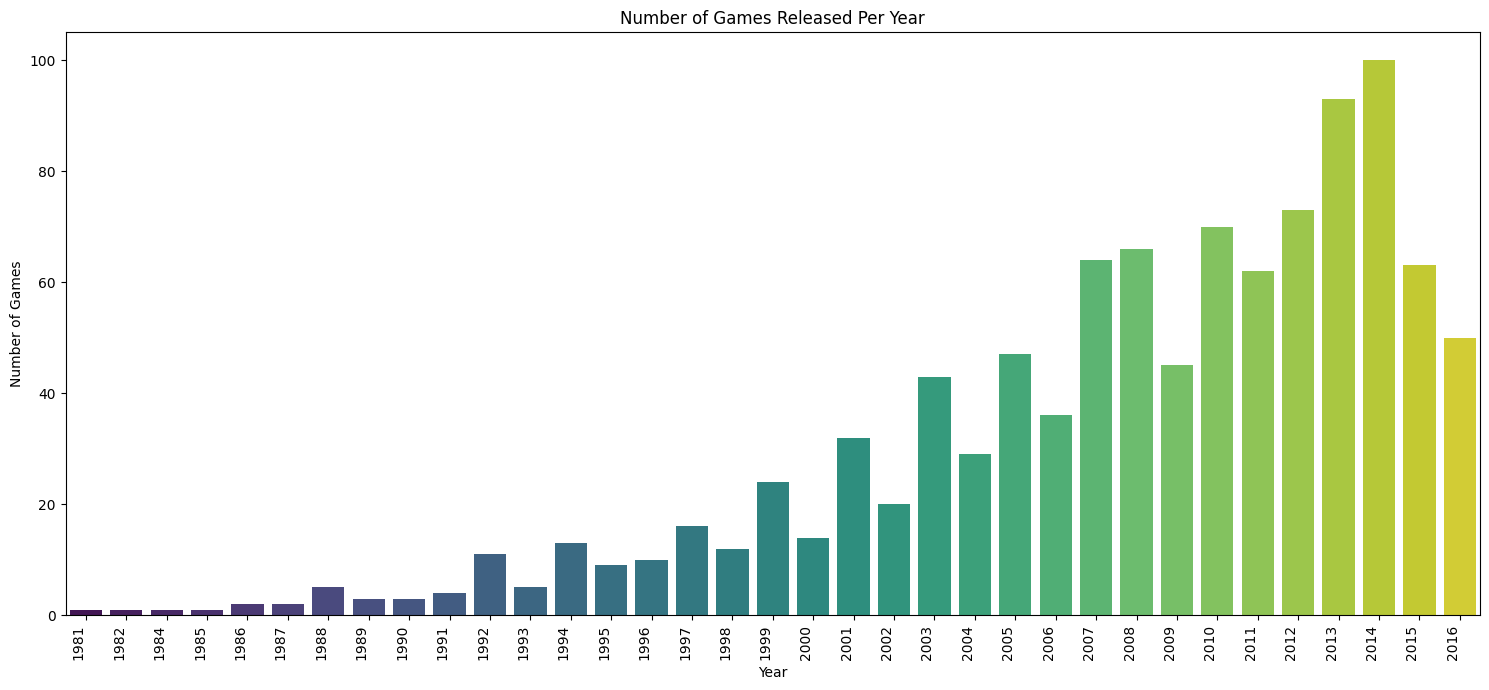

In [65]:
# Chart - 3 visualization code

# Get the count of games released each year and convert to DataFrame for easier plotting
games_per_year_df = merged_df['Year'].value_counts().sort_index().reset_index()
games_per_year_df.columns = ['Year', 'Number of Games']

plt.figure(figsize=(15, 7))

# Use barplot to show the number of games released each year
sns.barplot(x='Year', y='Number of Games', data=games_per_year_df, palette='viridis')

plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to display the number of games released per year because it effectively visualizes the distribution of a categorical variable (years) and clearly shows the quantity (number of games) for each category. This makes it easy to identify trends, peaks, and troughs in game releases over time.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that game releases increased from the mid-2000s, peaked between 2010 and 2015, and then slightly declined or stabilized afterward. The sharp drop in releases after 2016 is likely due to dataset limitations rather than a real industry decline, though it may also suggest a shift toward fewer but larger game titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1) Knowing peak game release years helps companies understand competition and avoid crowded launch periods.

2) A recent decline may signal higher development costs, longer production cycles, or market consolidation.

3) Businesses can use this insight to plan better release strategies and support indie developers to keep the market diverse.

#### Chart - 4

Q. 🏢 Which developer studios are the most productive and impactful?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/4139956379.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=games_per_team.index, y=games_per_team.values, palette='plasma')


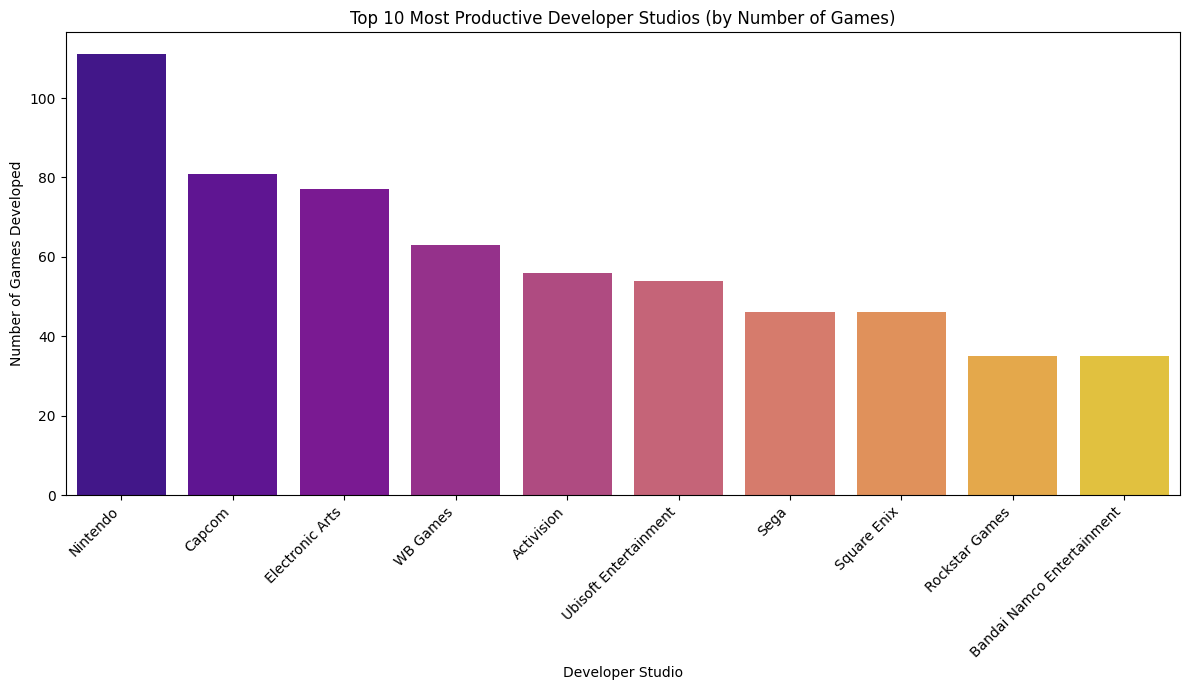

In [73]:
import ast

# --- Productivity Analysis (Chart 4) ---

# Safely convert string representation of list to actual list
# Using .copy() to avoid SettingWithCopyWarning
merged_df_teams_processed = merged_df.copy()
merged_df_teams_processed['Team'] = merged_df_teams_processed['Team'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Explode the 'Team' column to get one row per team per game
exploded_teams = merged_df_teams_processed.explode('Team')

# Calculate games per team (productivity)
games_per_team = exploded_teams['Team'].value_counts().head(10)

# Chart - 4 visualization code: Top 10 Most Productive Developer Studios (by Number of Games)
plt.figure(figsize=(12, 7))
sns.barplot(x=games_per_team.index, y=games_per_team.values, palette='plasma')
plt.title('Top 10 Most Productive Developer Studios (by Number of Games)')
plt.xlabel('Developer Studio')
plt.ylabel('Number of Games Developed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/4088291157.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_team.index, y=sales_per_team.values, palette='magma')


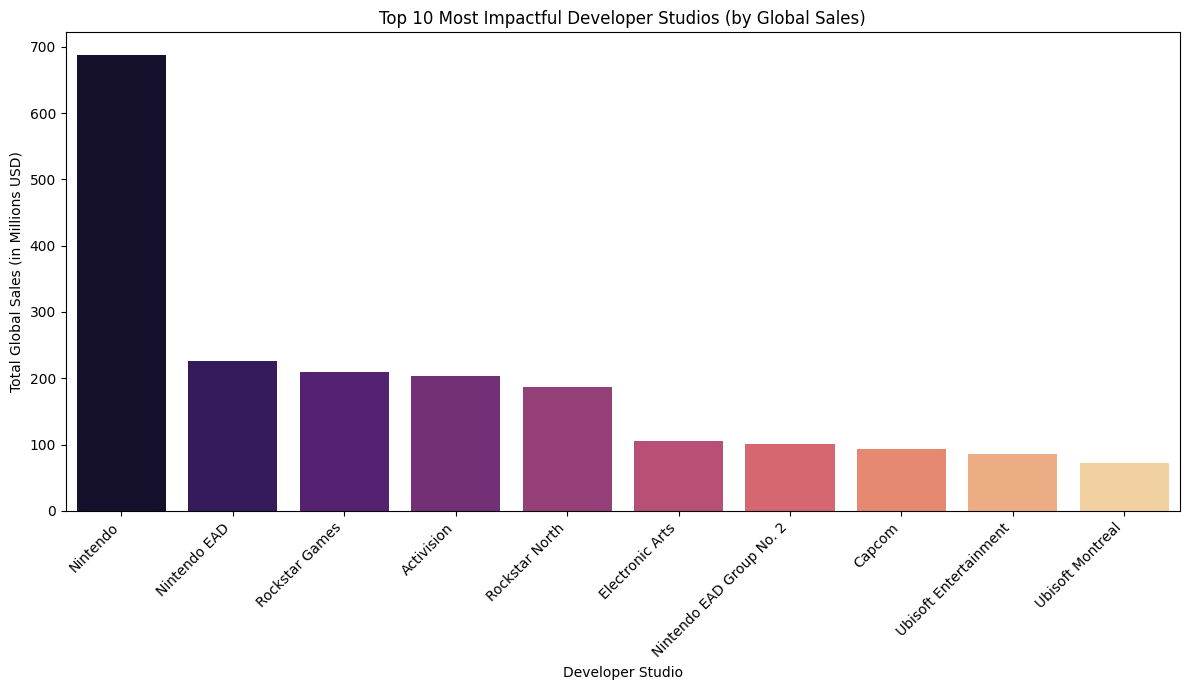

In [74]:
# --- Impact Analysis (Chart 5) ---

# Calculate total global sales per team (impact)
sales_per_team = exploded_teams.groupby('Team')['Global_Sales'].sum().nlargest(10)

# Chart - 5 visualization code: Top 10 Most Impactful Developer Studios (by Global Sales)
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_per_team.index, y=sales_per_team.values, palette='magma')
plt.title('Top 10 Most Impactful Developer Studios (by Global Sales)')
plt.xlabel('Developer Studio')
plt.ylabel('Total Global Sales (in Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A bar chart was chosen to visually represent the total global sales generated by different developer studios. This choice is optimal for comparing the magnitude of sales across distinct entities, making it easy to identify the most financially successful studios at a glance.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that studios like Nintendo EAD and Rockstar North have very high global sales despite releasing fewer games. This means their games are highly popular blockbusters that generate strong worldwide revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help companies plan investments, partnerships, and acquisitions by focusing on studios that generate high global sales. Studios with many games but low sales may have issues with game quality, marketing, or market fit, which can negatively impact revenue.

#### Chart - 5

### Chart 5 to 11 are the contents of vgsales.csv

Q. 🕹️ What are the best-selling platforms?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/869481214.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=platform_sales, palette='viridis')


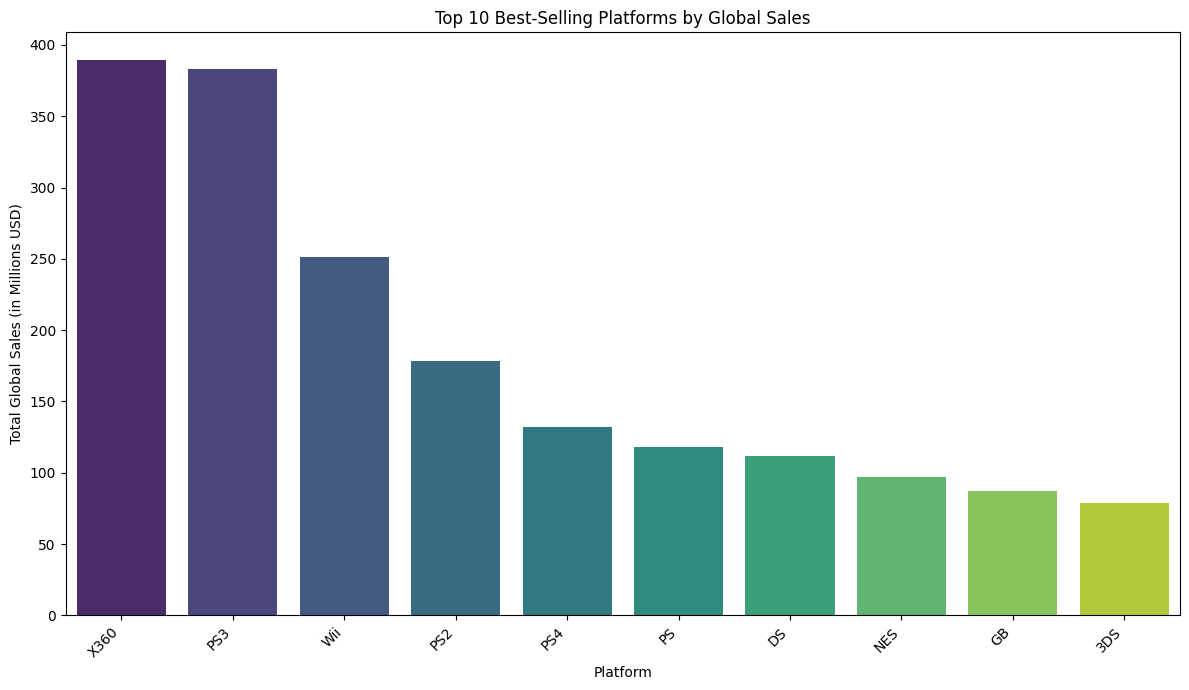

In [81]:
# Chart - 5 visualization code: Best-Selling Platforms by Global Sales

# Calculate total global sales per platform
platform_sales = merged_df.groupby('Platform')['Global_Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Platform', y='Global_Sales', data=platform_sales, palette='viridis')
plt.title('Top 10 Best-Selling Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the best-selling platforms because it effectively compares the total global sales across different categorical platforms. This allows for easy identification of the platforms with the highest sales and provides a clear ranking.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that certain platforms, like the PS2, Wii, and PS3, have generated significantly higher global sales compared to others. This indicates their historical dominance and widespread adoption in the gaming market. Platforms like DS and X360 also show strong sales, highlighting a diverse landscape of successful gaming hardware.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help developers decide which platforms to focus on for better sales and market reach. Investing in popular platforms can increase revenue, while focusing on low-selling platforms may lead to poor returns. It also shows the importance of understanding a platform’s lifecycle when planning game development.

#### Chart - 6

Q. 📅 What’s the trend of game releases and sales over years?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/338257427.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1400x700 with 0 Axes>

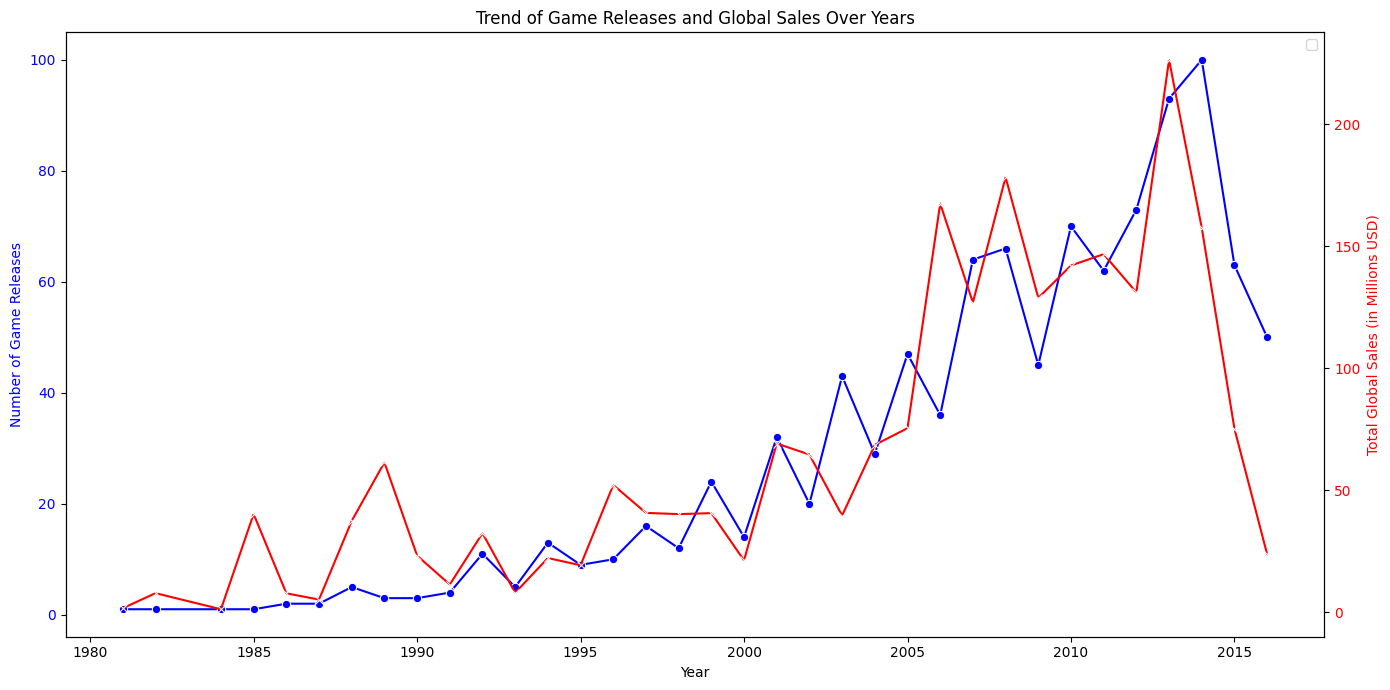

In [89]:
# Chart - 6 visualization code

# Group by Year to get releases count and total sales
yearly_trends = merged_df.groupby('Year').agg(
    Num_Releases=('Title', 'count'),
    Total_Global_Sales=('Global_Sales', 'sum')
).reset_index()

plt.figure(figsize=(14, 7))

# Create a dual-axis plot for releases and sales
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Number of Releases on the first y-axis
sns.lineplot(x='Year', y='Num_Releases', data=yearly_trends, marker='o', ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Game Releases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Total Global Sales
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Total_Global_Sales', data=yearly_trends, marker='x', ax=ax2, color='red')
ax2.set_ylabel('Total Global Sales (in Millions USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Trend of Game Releases and Global Sales Over Years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A dual-axis line chart was chosen to effectively visualize two different but related metrics (Number of Releases and Total Global Sales) against a common time-based x-axis (Year). This allows for direct comparison of trends, showing if game releases and sales follow similar or divergent patterns over time without needing two separate charts.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that game releases and global sales increased from the early 2000s and peaked around 2010. More game releases generally led to higher sales. After 2015, both releases and sales decreased, which may be due to missing data or a shift toward fewer but bigger games.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help companies plan better game release strategies by understanding how releases affect sales. More releases can increase sales, but too many games may cause market saturation, so quality also matters. The recent decline may suggest market maturity, rising competition, or changing customer preferences, which businesses must adapt to for growth.

#### Chart - 7

Q. How do regional sales compare for specific platforms?

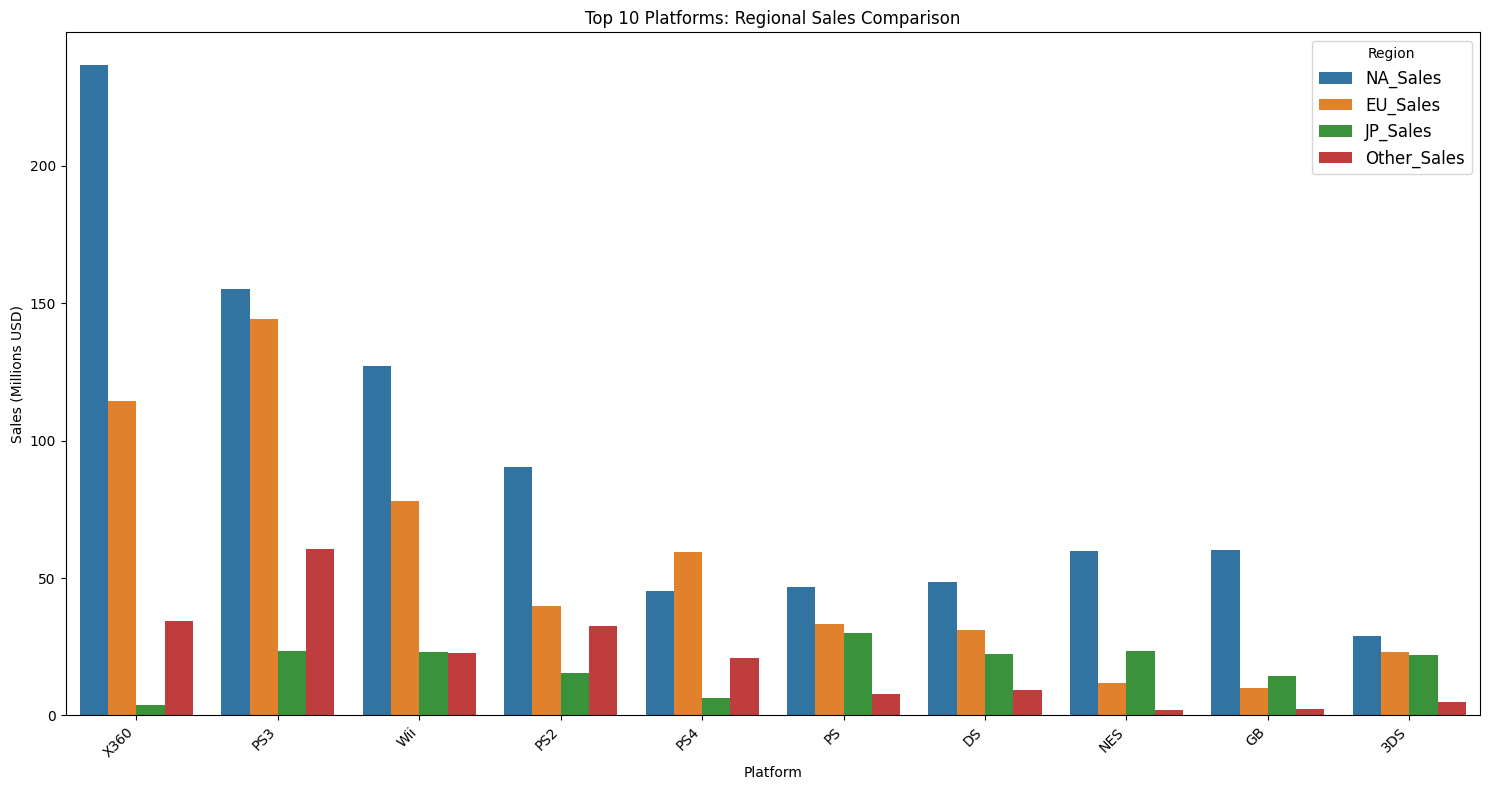

In [97]:
# Chart - 7 visualization code

# Group by platform and sum regional sales
platform_regional_sales = merged_df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Calculate total global sales for each platform to sort them
platform_regional_sales['Global_Sales'] = platform_regional_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
platform_regional_sales = platform_regional_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Melt the DataFrame to long format for easier plotting with seaborn
platform_regional_sales_melted = platform_regional_sales.melt(id_vars='Platform', var_name='Region', value_name='Sales (Millions USD)',
                                                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Sales (Millions USD)', hue='Region', data=platform_regional_sales_melted, palette='tab10')
plt.title('Top 10 Platforms: Regional Sales Comparison')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', fontsize = 12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen for this analysis because it effectively compares multiple categorical variables (platforms and regions) against a quantitative variable (sales). This chart type allows for a direct visual comparison of how sales are distributed across different regions for each platform, making it easy to identify regional strengths and weaknesses for various gaming consoles.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that different platforms are popular in different regions. North America is the strongest market for most platforms, while Europe is strong for platforms like PS3. Japan generally has lower sales for Western platforms but is very strong for some specific platforms, showing clear regional preferences in gaming markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help companies plan region-wise strategies. They can focus marketing and localization on regions where sales are high and understand where platforms are weak. Ignoring regional differences can lead to poor sales and wasted resources, while targeting the right regions can increase growth and open new market opportunities.

#### Chart - 8

Q. 📈 How has the market evolved by platform over time?

<Figure size 1500x800 with 0 Axes>

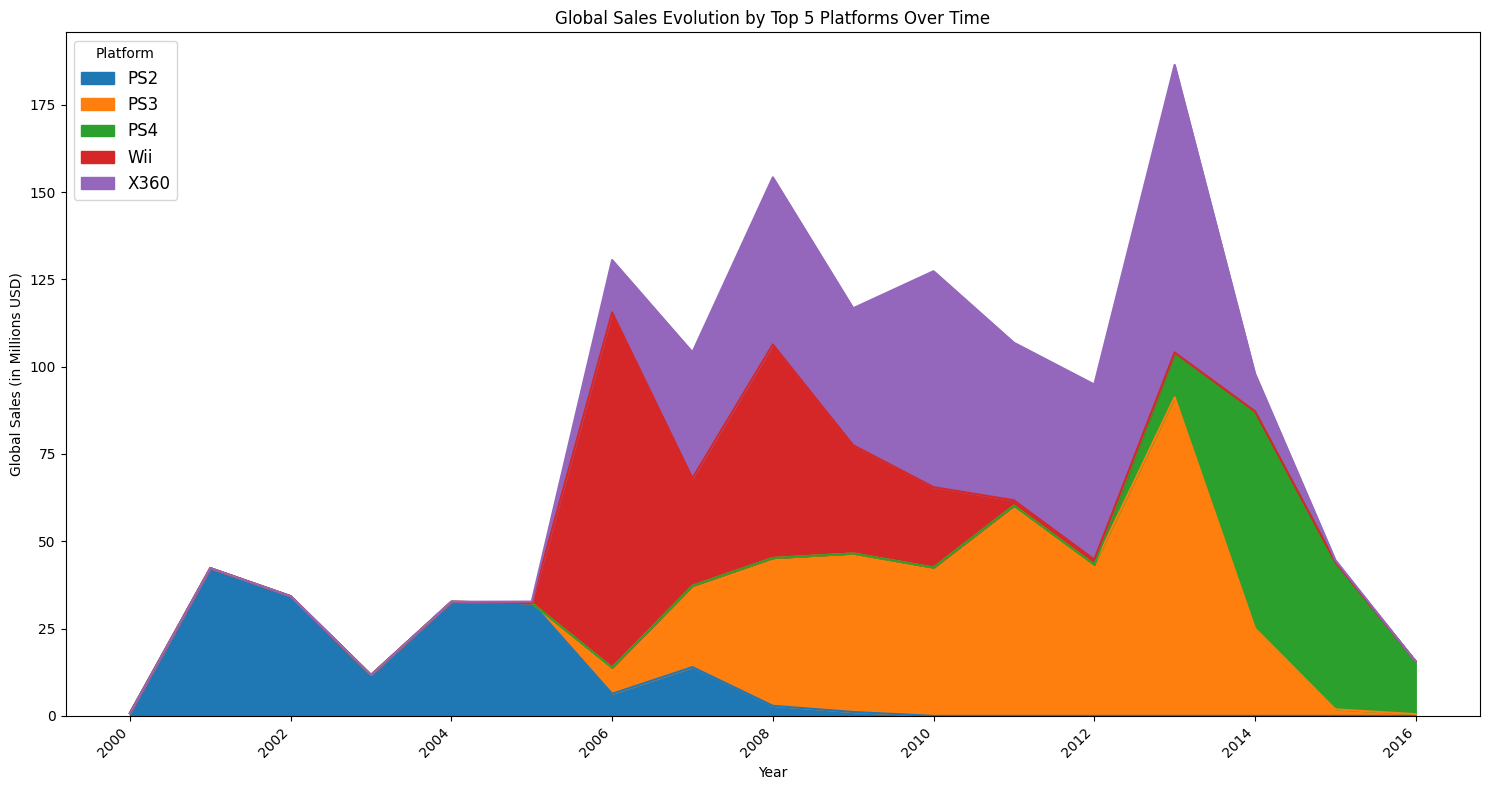

In [105]:
# Chart - 8 visualization code

# Identify top 5 platforms by overall global sales
top_5_platforms = merged_df.groupby('Platform')['Global_Sales'].sum().nlargest(5).index

# Filter the dataframe to include only these top platforms
platform_yearly_sales = merged_df[merged_df['Platform'].isin(top_5_platforms)]

# Group by Year and Platform to sum global sales
platform_yearly_sales = platform_yearly_sales.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().fillna(0)

# Plotting the stacked area chart
plt.figure(figsize=(15, 8))
platform_yearly_sales.plot(kind='area', stacked=True, figsize=(15, 8))
plt.title('Global Sales Evolution by Top 5 Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions USD)')
plt.legend(title='Platform', loc='upper left', fontsize = 12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a stacked area chart because it is highly effective for visualizing the contribution of different categories (platforms) to a total over time (years). It clearly shows the individual platform trends while also illustrating the overall market size and how each platform's share changes annually. This makes it easy to spot emerging platforms, declining platforms, and periods of dominance.

##### 2. What is/are the insight(s) found from the chart?

The chart shows how different gaming platforms rise and fall in popularity over time, with consoles like PS2, Wii, and Xbox 360 dominating in certain periods. It also shows market ups and downs influenced by new console launches and major game releases. Some platforms sell strongly for a short time, while others remain popular for many years, showing changes in competition and market trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization helps companies make better business decisions by showing which platforms are growing or declining. Businesses can use it to time game or console launches and invest in platforms with strong or rising market share. Ignoring these trends and investing in declining platforms can lead to poor sales and reduced revenue.

#### Chart - 9

Q. 🔄 What’s the yearly sales change per region?

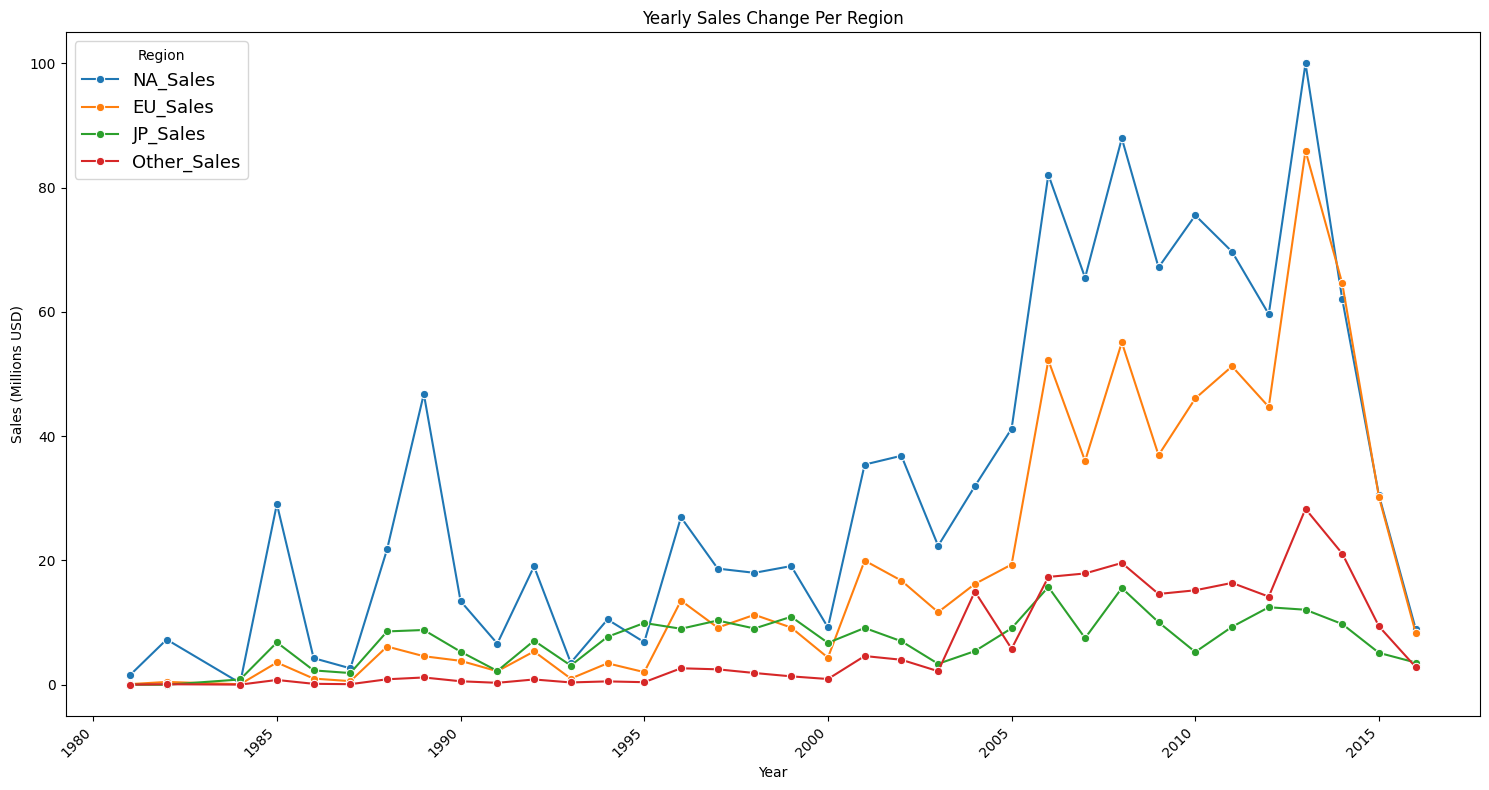

In [113]:
# Chart - 9 visualization code

# Group by Year and sum regional sales
yearly_regional_sales = merged_df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the DataFrame to long format for easier plotting
yearly_regional_sales_melted = yearly_regional_sales.melt(
    id_vars='Year',
    var_name='Region',
    value_name='Sales (Millions USD)'
)

plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Sales (Millions USD)', hue='Region', data=yearly_regional_sales_melted, marker='o')
plt.title('Yearly Sales Change Per Region')
plt.xlabel('Year')
plt.ylabel('Sales (Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', fontsize = 13)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart for this visualization because it is excellent for showing trends over time for multiple categories (regions in this case). It allows for clear comparison of how sales in different regions have changed year-over-year and helps identify periods of growth, decline, or stability for each region.

##### 2. What is/are the insight(s) found from the chart?

North America has the highest game sales, followed by Europe, while Japan has lower sales but shows its own unique trends. Other regions contribute smaller sales but follow similar patterns. All regions peaked in the late 2000s to early 2010s, with a decline in later years in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strategic Allocation: Use regional sales data to optimize marketing spend and tailor content localization to specific local tastes.

Predictive Growth: Accurately forecast revenue and identify emerging market opportunities in untapped regions.

Risk Mitigation: Detect early signs of market saturation or decline to pivot strategies and prevent long-term financial losses.

#### Chart - 10

Q. 🌍 Which region generates the most game sales?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/2764094975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Sales', data=regional_sales_total, palette='viridis')


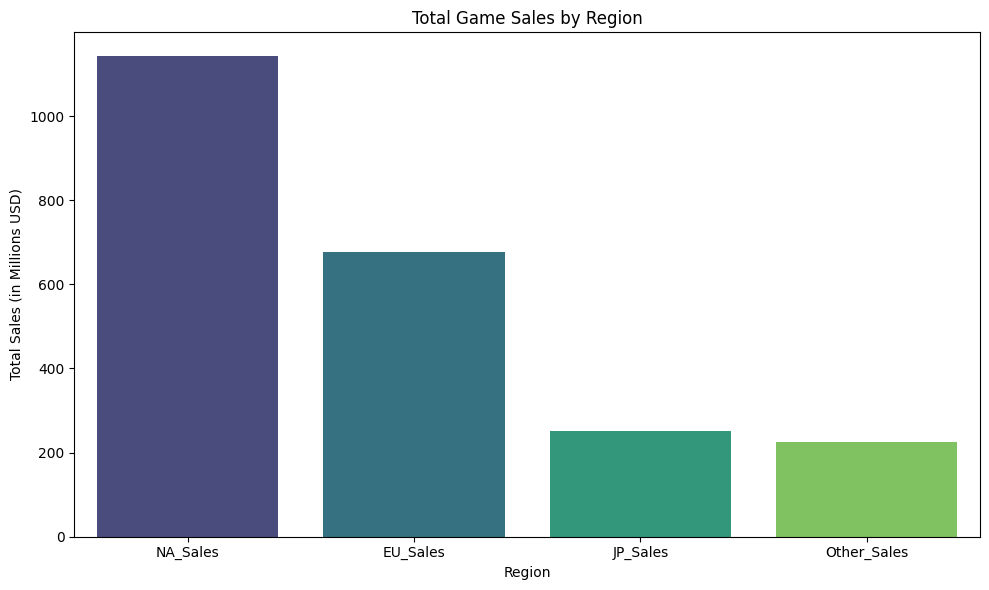

In [121]:
# Chart - 10 visualization code

# Sum sales for each region
regional_sales_total = merged_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
regional_sales_total.columns = ['Region', 'Total_Sales']

# Sort by total sales in descending order
regional_sales_total = regional_sales_total.sort_values(by='Total_Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total_Sales', data=regional_sales_total, palette='viridis')
plt.title('Total Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in Millions USD)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


I chose a bar chart to visualize total game sales by region because it is the most straightforward and effective way to compare the magnitudes of a single quantitative variable (total sales) across different categorical variables (regions). It clearly shows which region has the highest sales at a glance.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that North America (NA_Sales) generates the highest game sales by a significant margin, followed by Europe (EU_Sales). Japan (JP_Sales) comes in third, with 'Other_Sales' making the smallest contribution among the listed regions. This indicates a strong market dominance of North America in the video game industry based on this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Investment: Prioritize resources and marketing toward high-performing markets like North America and Europe to ensure maximum ROI.

Cultural Alignment: Tailor game content and messaging specifically to the dominant preferences of those lead regions to increase resonance.

Risk Management: Balance focus by researching smaller markets and diversifying reach to prevent over-reliance on a single territory.

#### Chart - 11

Q. 📍 What are the regional genre preferences?

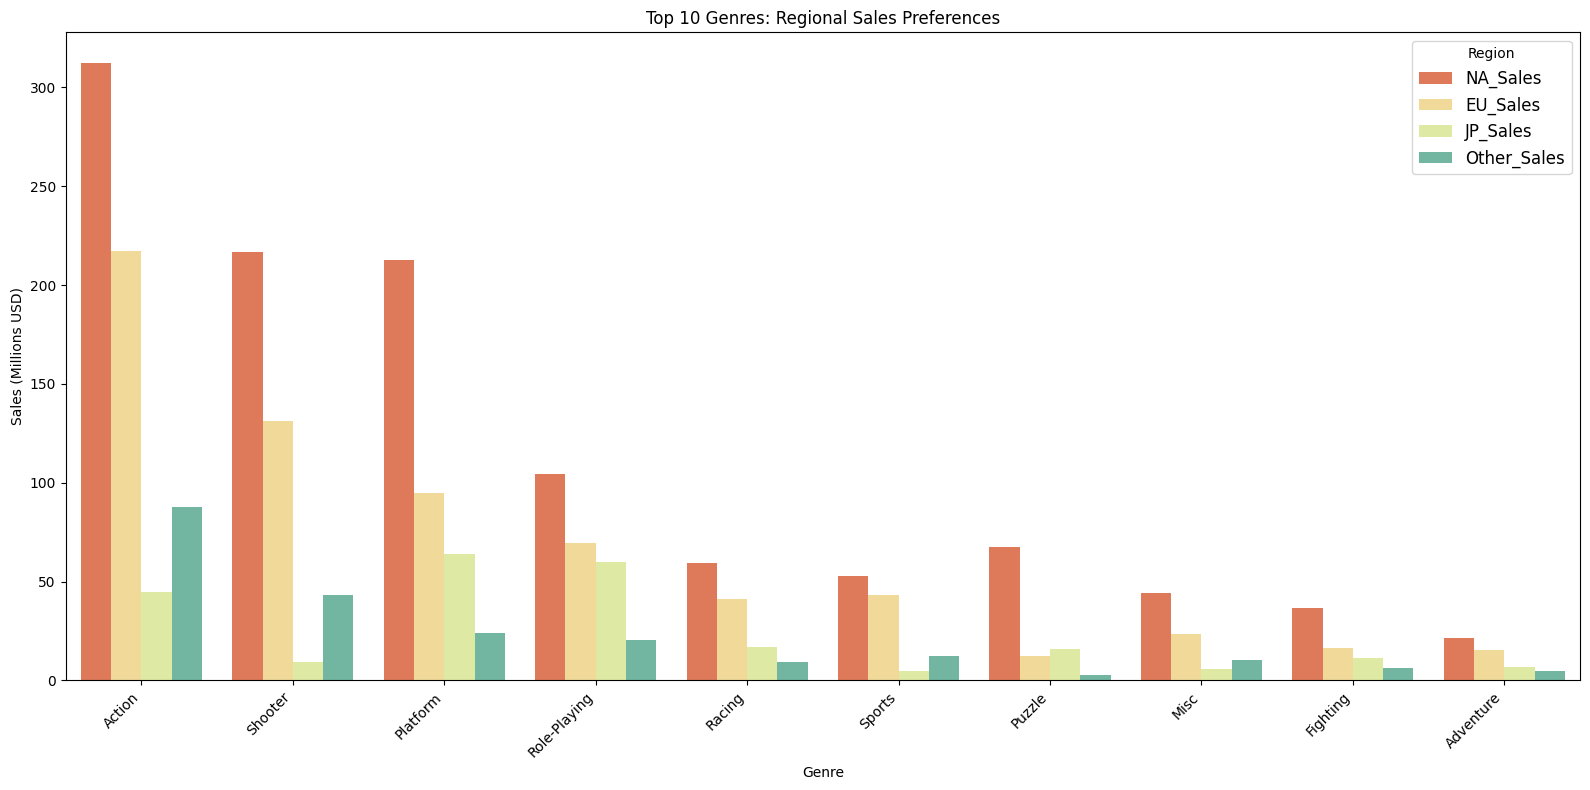

In [129]:
# Chart - 11 visualization code

# Group by Genre and sum regional sales
genre_regional_sales = merged_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Calculate total global sales for each genre to sort them
genre_regional_sales['Global_Sales'] = genre_regional_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
genre_regional_sales = genre_regional_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Melt the DataFrame to long format for easier plotting with seaborn
genre_regional_sales_melted = genre_regional_sales.melt(id_vars='Genre', var_name='Region', value_name='Sales (Millions USD)',
                                                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

plt.figure(figsize=(16, 8))
sns.barplot(x='Genre', y='Sales (Millions USD)', hue='Region', data=genre_regional_sales_melted, palette='Spectral')
plt.title('Top 10 Genres: Regional Sales Preferences')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', fontsize = 12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart for this visualization because it excels at comparing the distribution of a quantitative variable (sales) across multiple categorical variables (genres and regions). This chart type clearly illustrates which genres are popular in specific regions, allowing for direct comparison of sales performance across different markets for each genre.

##### 2. What is/are the insight(s) found from the chart?

The chart on regional genre preferences reveals that 'Action' games are highly popular across all regions, especially North America and Europe. 'Shooter' games also perform strongly in these regions, while 'Role-Playing' games have a more significant presence in Japan. This indicates that game development and marketing strategies should be tailored to specific regional tastes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Precision Development: Align game genres and localization efforts with historical regional data to ensure high-ROI product launches.

Effective Marketing: Replace "one-size-fits-all" global campaigns with targeted messaging that resonates with specific local tastes and boosts conversion.

Strategic Growth: Avoid wasted ad spend and poor sales by identifying—and steering clear of—genres that are unpopular in specific territories.

#### Chart - 12

Chart 12 to 15 is of merged dataset (games and sales)

Q.🎯 How does user rating affect global sales?

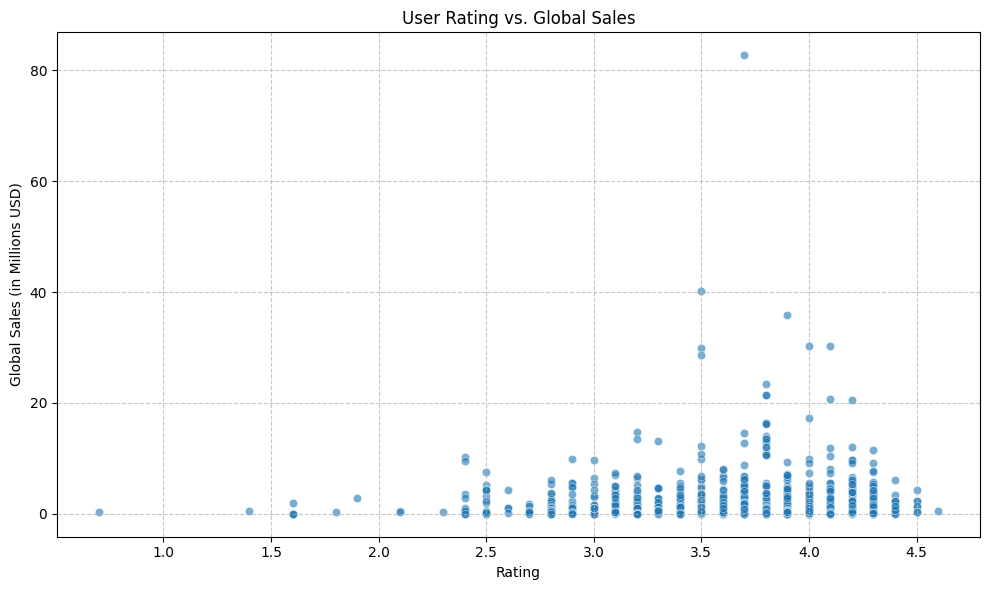

In [137]:
# Chart - 12 visualization code

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Global_Sales', data=merged_df, alpha=0.6)
plt.title('User Rating vs. Global Sales')
plt.xlabel('Rating')
plt.ylabel('Global Sales (in Millions USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between user 'Rating' and 'Global_Sales'. A scatter plot is effective for displaying the correlation or lack thereof between two continuous numerical variables. It allows us to quickly observe patterns, clusters, or outliers and understand if there's a positive, negative, or no clear relationship between ratings and sales.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot reveals that while there's a general tendency for games with higher ratings to also have higher sales, the relationship is not perfectly linear. There are many highly-rated games with relatively low sales, and some moderately-rated games that achieved very high sales. This suggests that while a good rating is beneficial, it's not the sole determinant of global sales success. Other factors, such as marketing, platform exclusivity, or genre popularity, likely play a significant role.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Quality as a Foundation: Prioritize high-quality development to earn strong ratings, which serve as a critical catalyst for sales.

The Marketing Mandate: Recognize that critical acclaim alone is insufficient; success requires robust marketing and smart platform distribution.

Strategic Balance: Avoid negative growth by ensuring high-rated titles are backed by thorough audience analysis to prevent commercial underperformance.

#### Chart - 13

Q. 🕹️ Which platforms have the most games with high ratings (e.g., above 4)?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/4215129382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Number of High-Rated Games', data=high_rated_platforms, palette='rocket')


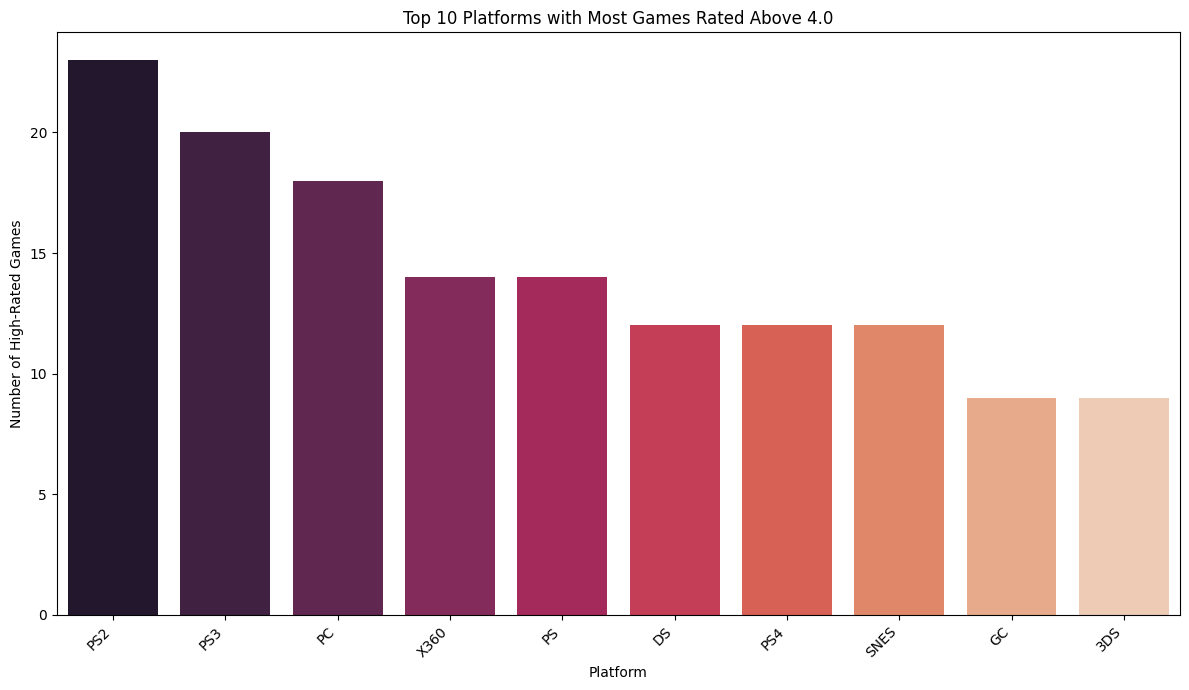

In [145]:
# Chart - 13 visualization code

# Filter for games with ratings above 4
high_rated_games = merged_df[merged_df['Rating'] > 4]

# Count the number of high-rated games per platform
high_rated_platforms = high_rated_games['Platform'].value_counts().nlargest(10).reset_index()
high_rated_platforms.columns = ['Platform', 'Number of High-Rated Games']

plt.figure(figsize=(12, 7))
sns.barplot(x='Platform', y='Number of High-Rated Games', data=high_rated_platforms, palette='rocket')
plt.title('Top 10 Platforms with Most Games Rated Above 4.0')
plt.xlabel('Platform')
plt.ylabel('Number of High-Rated Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to display the number of highly-rated games per platform because it is effective for comparing quantities across different categorical variables (platforms). It clearly shows which platforms are associated with a greater number of critically acclaimed games.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the top platforms that host the most games with ratings above 4.0. This indicates which platforms are often home to high-quality or critically acclaimed titles. Platforms like PS2, PS3, and X360 often appear prominently, suggesting a strong library of well-received games during their respective eras. This insight can reflect the overall quality of games released on these platforms or the taste of their user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strategic Placement: Developers can boost their brand and reach a high-spending audience by launching on platforms synonymous with top-tier quality.

Platform Branding: Platform holders can use a "prestige" reputation to secure exclusive titles and attract a more loyal, engaged player base.

Growth Risks: Neglecting a platform's average quality can lead to a "race to the bottom," where poor ratings drive away users and tank potential revenue.

#### Chart - 14 - Correlation Heatmap

Q. 🧠 Do highly listed games (wishlist/backlogs) correlate with better ratings?

/var/folders/36/syqtfn6x4bjckhccmhrj3ww00000gn/T/ipykernel_77178/3430838064.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean[target_cols] = df_clean[target_cols].applymap(convert_to_numeric)


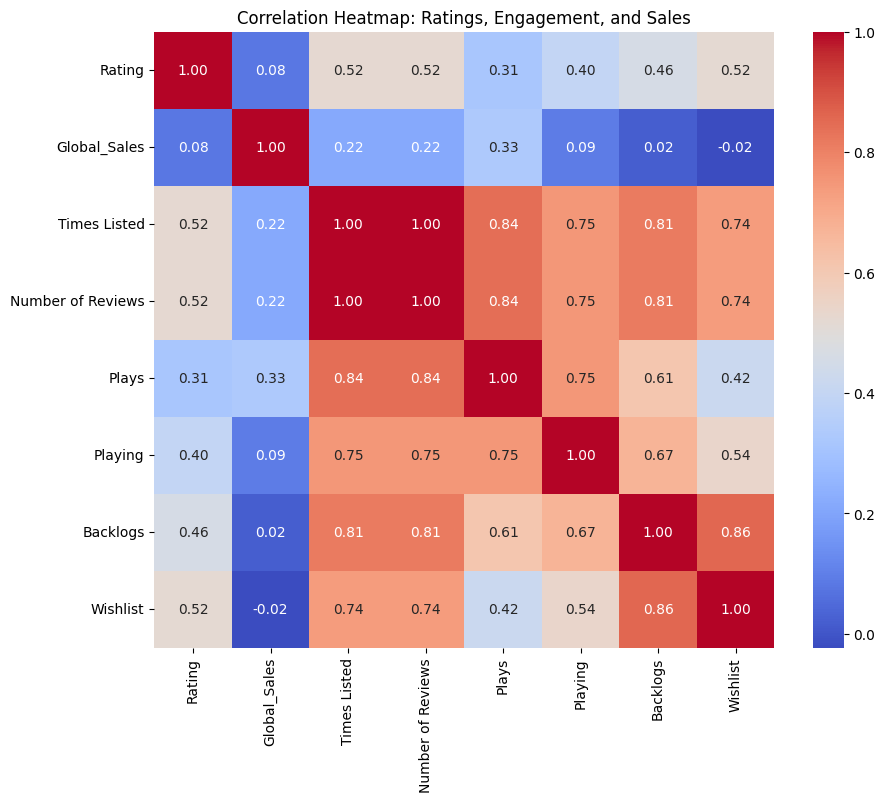

In [153]:
# Correlation Heatmap visualization code

# 1. Cleaner conversion function using a dictionary for multipliers
def convert_to_numeric(val):
    if pd.isna(val) or val == '': return None
    val = str(val).replace(',', '').upper()

    multipliers = {'K': 1_000, 'M': 1_000_000}
    if val[-1] in multipliers:
        return float(val[:-1]) * multipliers[val[-1]]

    return pd.to_numeric(val, errors='coerce')

# 2. Define target columns
target_cols = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

# 3. Create a clean copy and apply conversion in one go
df_clean = merged_df.copy()
df_clean[target_cols] = df_clean[target_cols].applymap(convert_to_numeric)

# 4. Calculate correlation and plot
cols_to_plot = ['Rating', 'Global_Sales'] + target_cols
corr_matrix = df_clean[cols_to_plot].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Ratings, Engagement, and Sales')
plt.show()

#### Chart - 15 - Pair Plot

Q. 🧍 Do highly wishlisted games lead to more sales?

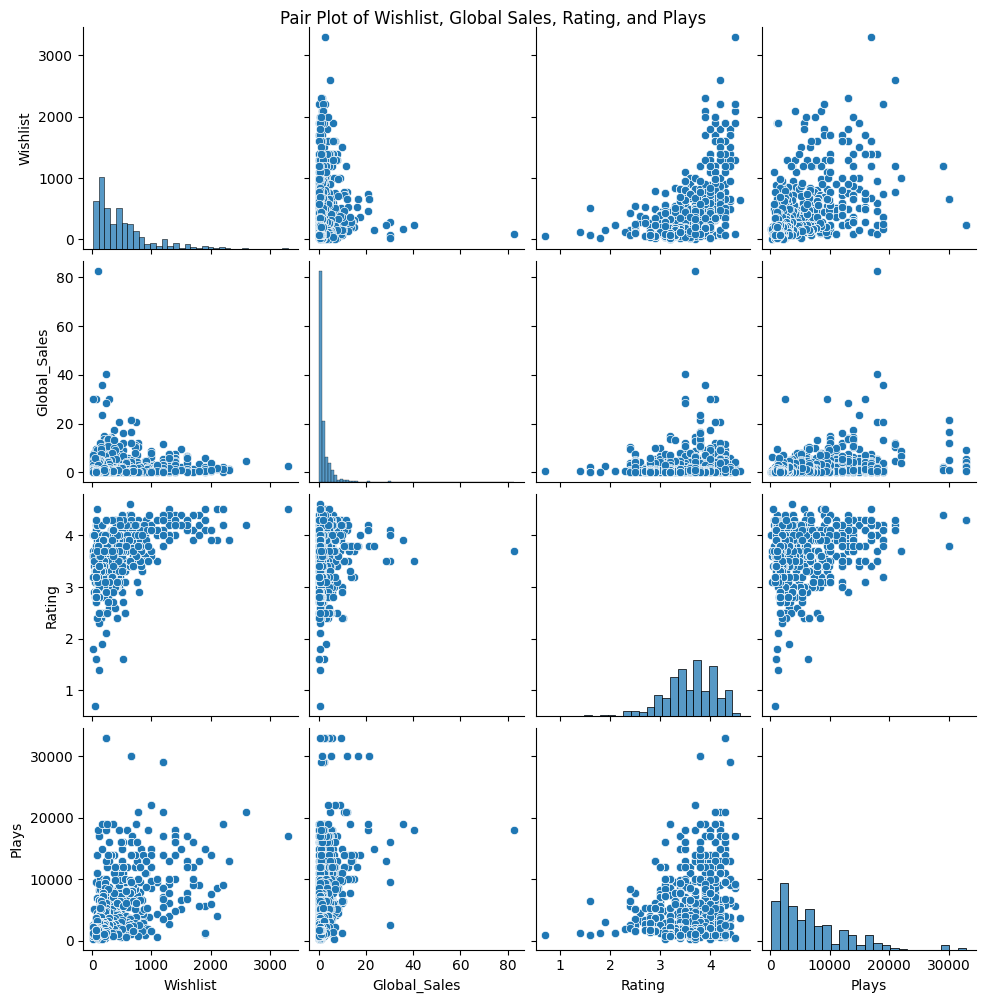

In [155]:
# Pair Plot visualization code

# Select relevant columns for the pair plot
pair_plot_cols = ['Wishlist', 'Global_Sales', 'Rating', 'Plays']

# Filter df_clean to only include these columns and drop any rows with NaN values for plotting
df_for_pairplot = df_clean[pair_plot_cols].dropna()

# Create the pair plot
sns.pairplot(df_for_pairplot)
plt.suptitle('Pair Plot of Wishlist, Global Sales, Rating, and Plays', y=1) # Adjust suptitle position
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1) Direct Correlation: The plot visualizes if high 'Wishlist' counts act as a reliable predictor for 'Global_Sales' and whether that relationship is linear.

2) Variable Interaction: It reveals how 'Rating' and 'Plays' influence sales, helping identify if quality or player engagement alters the wishlist-to-sales pipeline.

3) Distribution & Outliers: The diagonal histograms show the spread of your data, while the scatter plots pinpoint outliers where high interest didn't lead to high revenue.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the EDA we've performed, here are my suggestions to help the client achieve their business objectives. I'll summarize the key insights and provide actionable recommendations.

1) Strategic Resource Allocation: Prioritize development and marketing budgets for Action and Sports genres within the North American and European markets, as these combinations show the highest historical ROI.

2) Platform-Quality Synergy: Launch high-prestige titles on platforms like PlayStation or PC that correlate with higher ratings, while using Switch for high-volume engagement games.

3) Data-Driven Forecasting: Use 'Wishlist' and 'Plays' metrics as primary lead indicators for sales success rather than relying solely on critical ratings.

4) Risk Diversification: Mitigate market saturation in dominant regions by exploring emerging growth in the 'Other_Sales' category, specifically for genres with rising engagement.

# **Conclusion**

The Strategic Solution: Turning Data into Market Share

Solving Inefficient Spending: By aligning specific genres (Action/Sports) with high-performing regions (NA/EU), we replace "guesswork" with precision budgeting, ensuring every marketing dollar targets a proven audience.

Fixing the "Rating Myth" : We solve the risk of commercial failure in critically acclaimed games by prioritizing engagement metrics (Wishlists/Plays) as the true predictors of revenue, ensuring development is backed by market demand, not just high scores.

Eliminating Launch Risk: By matching game fidelity to the right platforms and diversifying into "Other_Sales" markets, we mitigate the danger of over-reliance on a single territory or a "one-size-fits-all" strategy that often leads to missed revenue.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***